In [23]:
import pandas as pd
sports = pd.read_csv("datasets_full/London/london_sports_participation.csv")
sports['area'] = sports['area'].str.lower()
#Focus on second year becasue data is from October to October
sports['singleYear'] = sports['year'].str[5:]
sports = sports[sports['singleYear'] != '2006']

In [54]:
#Change the one+ category so it doesnt include three+
for i in range(len(sports)):
    row = sports.iloc[i]
    if(row['sports_participation'] == 'one+'):
        print(row['percentage'])
        row['percentage'] = row['percentage'] 

0.348
0.354
0.358
0.335
0.36
0.35200000000000004


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.34
0.331
0.327
0.365
0.366
0.364
0.359
0.368
0.365
0.363
0.353
0.35700000000000004
0.361
0.34600000000000003
0.36
0.35100000000000003
0.368
0.36700000000000005
0.35100000000000003
0.341
0.34700000000000003
0.36
0.364
0.35100000000000003
0.342
0.359
0.348
0.348
0.345
0.34700000000000003
0.34
0.34299999999999997
0.337
0.335
0.341
0.33899999999999997
0.33899999999999997
0.33799999999999997
0.33799999999999997
0.375
0.365
0.359
0.35600000000000004
0.369
0.359
0.35600000000000004
0.35600000000000004
0.36200000000000004
0.37
0.38
0.368
0.366
0.37799999999999995
0.385
0.38
0.38
0.37799999999999995
0.39
0.379
0.379
0.368
0.384
0.381
0.376
0.377
0.38299999999999995
0.365
0.37
0.365
0.366
0.374
0.368
0.365
0.365
0.365
0.366
0.365
0.36200000000000004
0.35600000000000004
0.369
0.366
0.361
0.358
0.361
nan
0.466
0.502
nan
nan
nan
0.37
nan
nan
0.268
0.314
0.263
0.264
0.29
0.261
0.228
0.265
0.248
0.381
0.364
0.376
0.36200000000000004
0.375
0.391
0.409
0.377
0.402
0.324
0.35
0.305
0.368
0.35200000000

In [24]:
#sports[(sports['sports_participation'] == 'three+') & (sports['area'] == row['area']) & (sports['singleYear'] == row['singleYear'])]['percentage'].iloc[0]
        
#Here are all the Official London Boroughs
boroughs = ['camden', 'greenwich', 'hackney', 'hammersmith and fulham', 'islington', 'kensington and chelsea', 
            'lambeth', 'lewisham', 'southwark', 'tower hamlets', 'wandsworth', 'westminster', 'barking and dagenham',
           'barnet', 'bexley', 'brent', 'bromley', 'croydon', 'ealing','enfield','haringey','harrow', 'havering',
           'hillingdon', 'hounslow', 'kingston upon thames', 'merton', 'newham', 'redbridge', 'richmond upon thames',
           'sutton','waltham forest']

In [32]:
londonSports = sports[sports.area.isin(boroughs)]
londonSports.head()

,year,area_code,area,sports_participation,percentage,population,singleYear
111,2007-2008,00AB,barking and dagenham,one+,0.268,33900.0,2008
112,2008-2009,00AB,barking and dagenham,one+,0.314,40000.0,2009
113,2009-2010,00AB,barking and dagenham,one+,0.263,34900.0,2010
114,2010-2011,00AB,barking and dagenham,one+,0.264,35600.0,2011
115,2011-2012,00AB,barking and dagenham,one+,0.290,40200.0,2012


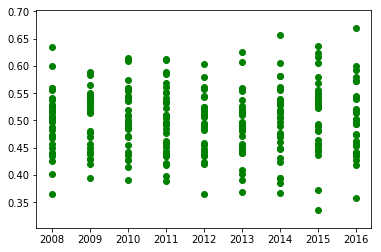

In [26]:
#Graph of people participating in zero sports in London Boroughs
import matplotlib.pyplot as plt
plt.scatter(londonSports[londonSports['sports_participation'] == 'zero']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'zero']['percentage'], 
         color='green')

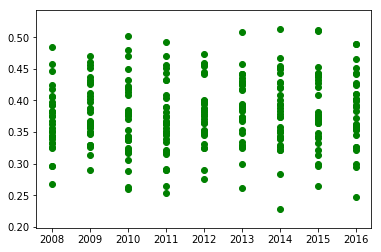

In [27]:
#Graph of people participating in one+ sports in London Boroughs
plt.scatter(londonSports[londonSports['sports_participation'] == 'one+']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'one+']['percentage'], 
         color='green')

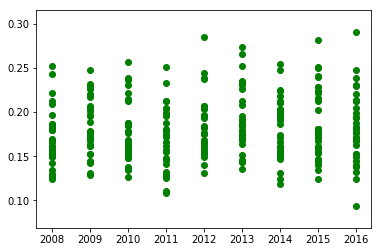

In [29]:
#Graph of people participating in three+ sports in London Boroughs
plt.scatter(londonSports[londonSports['sports_participation'] == 'three+']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'three+']['percentage'], 
         color='green')

In [30]:
totalYears = londonSports['singleYear'].unique()

In [46]:
import statistics
import numpy as np
totalNumZero = list(range(len(totalYears)))
totalNumOne = list(range(len(totalYears)))
totalNumThree = list(range(len(totalYears)))
count = 0
for i in totalYears:
    oneYear = londonSports[londonSports['singleYear'] == i]
    totalNumZero[count] = np.dot(oneYear[oneYear['sports_participation'] == 'zero']['percentage'], oneYear[oneYear['sports_participation'] == 'zero']['population'])
    totalNumOne[count] = np.dot(oneYear[oneYear['sports_participation'] == 'one+']['percentage'], oneYear[oneYear['sports_participation'] == 'one+']['population'])
    totalNumThree[count] = np.dot(oneYear[oneYear['sports_participation'] == 'three+']['percentage'], oneYear[oneYear['sports_participation'] == 'three+']['population'])
    count=count+1

In [47]:
totalEachYear = ({'year':totalYears, 
                 'totalNumZero':totalNumZero,
                 'totalNumOne':totalNumOne,
                 'totalNumThree':totalNumThree})

In [36]:
import numpy as np
sports['area'] = sports['area'].str.lower()
mapData['Area'] = mapData['Area'].str.lower()
sports['starting_year'] = sports['year']
sports['starting_year'] = sports['starting_year'].str[:4]

def calculate_change_category(cityName, categoryName, startingYear):
    sportsSubset = sports[(sports['area'] == cityName) & (sports['sports_participation'] == categoryName)]
    sportsSubset1 = sportsSubset[sportsSubset['starting_year'] == startingYear]
    sportsSubset2 = sportsSubset[sportsSubset['starting_year'] == str(int(startingYear)+1)]
    if(len(sportsSubset2['percentage']) == 0 or len(sportsSubset1['percentage']) == 0):
        return(float('nan'))
    return (sportsSubset2['percentage'].iloc[0] - sportsSubset1['percentage'].iloc[0])


def calculate_category(cityName, categoryName, startingYear):
    sportsSubset = sports[(sports['area'] == cityName) & (sports['sports_participation'] == categoryName)]
    sportsSubset1 = sportsSubset[sportsSubset['starting_year'] == startingYear]
    if(len(sportsSubset1['percentage']) == 0):
        return(float('nan'))
    return sportsSubset1['percentage'].iloc[0]

In [37]:
mapData['Zero_Pct_Change_09-10'] = mapData['Nums']
mapData['Zero_Pct_Change_10-11'] = mapData['Nums']
mapData['Zero_Pct_Change_11-12'] = mapData['Nums']
mapData['Zero_Pct_Change_12-13'] = mapData['Nums']

mapData['One_Pct_Change_09-10'] = mapData['Nums']
mapData['One_Pct_Change_10-11'] = mapData['Nums']
mapData['One_Pct_Change_11-12'] = mapData['Nums']
mapData['One_Pct_Change_12-13'] = mapData['Nums']

mapData['Three_Pct_Change_09-10'] = mapData['Nums']
mapData['Three_Pct_Change_10-11'] = mapData['Nums']
mapData['Three_Pct_Change_11-12'] = mapData['Nums']
mapData['Three_Pct_Change_12-13'] = mapData['Nums']

mapData['Zero_10-11'] = mapData['Nums']
mapData['Zero_11-12'] = mapData['Nums']
mapData['Zero_12-13'] = mapData['Nums']
mapData['One_10-11'] = mapData['Nums']
mapData['One_11-12'] = mapData['Nums']
mapData['One_12-13'] = mapData['Nums']
mapData['Three_10-11'] = mapData['Nums']
mapData['Three_11-12'] = mapData['Nums']
mapData['Three_12-13'] = mapData['Nums']

In [38]:
for i in range(len(mapData)):
    mapData['Zero_Pct_Change_09-10'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'zero', '2009')
    mapData['Zero_Pct_Change_10-11'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'zero', '2010')
    mapData['Zero_Pct_Change_11-12'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'zero', '2011')
    mapData['Zero_Pct_Change_12-13'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'zero', '2012')
    mapData['One_Pct_Change_09-10'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'one+', '2009')
    mapData['One_Pct_Change_10-11'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'one+', '2010')
    mapData['One_Pct_Change_11-12'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'one+', '2011')
    mapData['One_Pct_Change_12-13'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'one+', '2012')
    mapData['Three_Pct_Change_09-10'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'three+', '2009')
    mapData['Three_Pct_Change_10-11'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'three+', '2010')
    mapData['Three_Pct_Change_11-12'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'three+', '2011')
    mapData['Three_Pct_Change_12-13'].iloc[i] = calculate_change_category(mapData['Area'].iloc[i], 'three+', '2012')

    mapData['Zero_10-11'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'zero', '2010')
    mapData['Zero_11-12'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'zero', '2011')
    mapData['Zero_12-13'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'zero', '2012')
    mapData['One_10-11'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'one+', '2010')
    mapData['One_11-12'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'one+', '2011')
    mapData['One_12-13'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'one+', '2012')
    mapData['Three_10-11'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'three+', '2010')
    mapData['Three_11-12'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'three+', '2011')
    mapData['Three_12-13'].iloc[i] = calculate_category(mapData['Area'].iloc[i], 'three+', '2012')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
#Very clear, before, during, and after the olympics there is a strong correlation 
graphData = mapData.dropna()
x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_10-11'], color='black')
y = graphData['Zero_10-11']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black')

x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_11-12'], color='blue')
y = graphData['Zero_11-12']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue')

x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_12-13'], color='green')
y = graphData['Zero_12-13']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green')


KeyError: 'IncomeCategory'